[video link](https://www.youtube.com/watch?v=7O4dpR9QMIM&list=PL2zq7klxX5ASFejJj80ob9ZAnBHdz5O1t&index=5)

## Upload the data

Imports necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

upload the data

In [3]:
df = pd.read_csv("data\clean\Data_Engineer\Data_Engineer_15-04-2023.csv", index_col=0, header=[0, 1])

In [5]:
df = df[df['Job_details']['Region'] == 'Europe']

In [6]:
# choose relevant columns
df.columns.tolist()


[('Job_details', 'Title'),
 ('Job_details', 'Description'),
 ('Job_details', 'Is_contract'),
 ('Job_details', 'Seniority'),
 ('Job_details', 'City'),
 ('Job_details', 'State'),
 ('Job_details', 'Country'),
 ('Job_details', 'Region'),
 ('Job_details', 'Job_age'),
 ('Job_details', 'Easy_apply'),
 ('Salary', 'Min'),
 ('Salary', 'Max'),
 ('Salary', 'Avg'),
 ('Salary', 'Currency'),
 ('Salary', 'Employer_provided'),
 ('Salary', 'Is_hourly'),
 ('Salary', 'Specified'),
 ('Company_info', 'Name'),
 ('Company_info', 'Rating'),
 ('Company_info', 'Employees'),
 ('Company_info', 'Type_of_ownership'),
 ('Company_info', 'Sector'),
 ('Company_info', 'Industry'),
 ('Company_info', 'Company_age'),
 ('Company_info', 'Revenue_USD'),
 ('Company_info', 'Friend_recommend'),
 ('Company_info', 'CEO_approval'),
 ('Company_info', 'Career_opportunities'),
 ('Company_info', 'Comp_&_benefits'),
 ('Company_info', 'Senior_management'),
 ('Company_info', 'Work/Life_balance'),
 ('Company_info', 'Culture_&_values'),
 ('C

### Select the relevant data 

In [7]:
df_model = pd.DataFrame()

columns_to_move = [
    ('Job_details', 'Country'),
    ('Job_details', 'Seniority'),
    ('Job_details', 'Job_age'),
    ('Salary', 'Avg'),
    ('Salary', 'Employer_provided'),
    ('Salary', 'Is_hourly'),
    ('Company_info', 'Rating'),
    ('Company_info', 'Employees'),
    ('Company_info', 'Type_of_ownership'),
    ('Company_info', 'Sector'),
    ('Company_info', 'Company_age'),
    ('Company_info', 'Revenue_USD'),
    ('Programming_languages', 'SQL'),
    ('Programming_languages', 'Python'),
    ('Programming_languages', 'Java'),
    ('Programming_languages', 'Scala'),
    ('Cloud_platforms', 'Microsoft_Azure'),
    ('Cloud_platforms', 'AWS'),
    ('Cloud_platforms', 'GPC'),
    ('Data_integration_and_processing', 'Databricks'),
    ('Search_&_Analytics', 'Snowflake'),
    ('Stream_processing_tools', 'Apache_Kafka')
]

extracted_columns = df.loc[:, columns_to_move]

extracted_columns.columns = extracted_columns.columns.droplevel(0)

extracted_columns = extracted_columns.rename(columns={'Avg': 'Salary_avg'})

df_model[extracted_columns.columns] = extracted_columns

df_model.columns


Index(['Country', 'Seniority', 'Job_age', 'Salary_avg', 'Employer_provided',
       'Is_hourly', 'Rating', 'Employees', 'Type_of_ownership', 'Sector',
       'Company_age', 'Revenue_USD', 'SQL', 'Python', 'Java', 'Scala',
       'Microsoft_Azure', 'AWS', 'GPC', 'Databricks', 'Snowflake',
       'Apache_Kafka'],
      dtype='object')

In [8]:
bi_subcolumns = df['Business_Intelligence_Tools'].columns

is_true = df['Business_Intelligence_Tools'][bi_subcolumns].any(axis=1)
df_model['BI_Tools'] = is_true.astype(bool)

In [9]:
# To avoid bugs with infinitive values
df_model = df_model.fillna(-1)

In [10]:
df_model.head()

,Country,Seniority,Job_age,Salary_avg,Employer_provided,Is_hourly,Rating,Employees,Type_of_ownership,Sector,...,Python,Java,Scala,Microsoft_Azure,AWS,GPC,Databricks,Snowflake,Apache_Kafka,BI_Tools
66,Austria,Junior,11,39804.0,True,False,4.1,1 to 50,Company - Private,-1,...,False,False,False,False,False,False,False,False,False,False
67,Austria,-1,31,-1.0,False,-1,4.4,51 to 200,Company - Private,Human Resources & Staffing,...,False,False,False,False,False,False,False,False,False,False
68,Austria,-1,13,-1.0,False,-1,3.6,10000+,Company - Private,Retail & Wholesale,...,False,False,False,False,False,False,False,False,False,False
69,Austria,Management,31,-1.0,False,-1,4.0,10000+,Company - Public,Financial Services,...,True,False,False,False,False,False,True,False,False,False
70,Austria,Junior,31,-1.0,False,-1,4.1,1 to 50,Company - Private,-1,...,False,False,False,False,False,False,False,False,False,False


## Get dummy data

Transforms categorical variables into numerical form by creating binary indicator variables for each category, resulting in a new DataFrame called 'df_dum'

In [11]:
df_dum = pd.get_dummies(df_model)

In [12]:
df_dum.columns

Index(['Job_age', 'Salary_avg', 'Employer_provided', 'Rating', 'Company_age',
       'SQL', 'Python', 'Java', 'Scala', 'Microsoft_Azure', 'AWS', 'GPC',
       'Databricks', 'Snowflake', 'Apache_Kafka', 'BI_Tools',
       'Country_Austria', 'Country_Belgium', 'Country_Czech Republic',
       'Country_Denmark', 'Country_Finland', 'Country_France',
       'Country_Germany', 'Country_Greece', 'Country_Hungary',
       'Country_Ireland', 'Country_Israel', 'Country_Italy',
       'Country_Luxembourg', 'Country_Netherlands', 'Country_Norway',
       'Country_Poland', 'Country_Portugal', 'Country_Romania',
       'Country_Spain', 'Country_Sweden', 'Country_Switzerland',
       'Country_Turkey', 'Country_United Kingdom', 'Seniority_-1',
       'Seniority_Junior', 'Seniority_Management', 'Seniority_Mid',
       'Seniority_Senior', 'Is_hourly_-1', 'Is_hourly_False', 'Is_hourly_True',
       'Employees_-1', 'Employees_1 to 50', 'Employees_10000+',
       'Employees_1001 to 5000', 'Employees_201 to

## Train the split
Splits the data into two separate datasets, one for training the model and the other for testing its performance, using the train_test_split function from scikit-learn.

In [13]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('Salary_avg', axis =1)
y = df_dum['Salary_avg'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
my_xnames = X.columns

new_index = pd.Index(["Salary_avg"])

my_xnames = pd.Index(new_index.tolist() + my_xnames.tolist())

## Multiple linear regression
Utilizes the OLS method from the statsmodels library to estimate the relationship between multiple independent variables and a dependent variable through linear regression.

In [15]:
import statsmodels.api as sm

X = np.asarray(X)
y = np.asarray(y)

X = np.nan_to_num(X)
y = np.nan_to_num(y)

X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

X_sm = X = sm.add_constant(X)

model = sm.OLS(y,X_sm)
model.data.xnames = my_xnames.tolist()

In [16]:
results = model.fit().summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     220.9
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:20:12   Log-Likelihood:                -24316.
No. Observations:                2266   AIC:                         4.882e+04
Df Residuals:                    2173   BIC:                         4.935e+04
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Salary_avg                                          3.416e+04   1268.347     26.930      0.000    3.17e+04    3.66e+04
Job_age                                               66.2649     24.657      2.687      0.007      17.911     114.619
Employer_provided                                     81.2503   1937.430      0.042      0.967   -3718.159    3880.659
Rating                                              -119.8629    184.222     -0.651      0.515    -481.132     241.406
Company_age                                           -8.1567      7.262     -1.123      0.261     -22.397       6.084
SQL                                                 -543.6121    768.827     -0.707      0.480   -2051.324     964.100
Python                                              1141.8297    792.865      1.440      0.150    -413.024    2696.683
Java                                               -2956.0003   1263.510     -2.340      0.019   -5433.814    -478.187
Scala                                               2194.4105   1391.244      1.577      0.115    -533.897    4922.718
Microsoft_Azure                                     -341.9032    829.733     -0.412      0.680   -1969.057    1285.250
AWS                                                 1721.8805    893.037      1.928      0.054     -29.415    3473.176
GPC                                                 1434.0168   1302.776      1.101      0.271   -1120.800    3988.834
Databricks                                          -236.2249   1398.378     -0.169      0.866   -2978.523    2506.073
Snowflake                                            375.9198   1576.159      0.239      0.812   -2715.016    3466.856
Apache_Kafka                                        1640.6154   1285.347      1.276      0.202    -880.023    4161.253
BI_Tools                                            2663.3717   1178.993      2.259      0.024     351.301    4975.443
Country_Austria                                      751.7298   1046.533      0.718      0.473   -1300.580    2804.039
Country_Belgium                                      948.1194   1486.835      0.638      0.524   -1967.649    3863.887
Country_Czech Republic                             -1342.3448   1383.944     -0.970      0.332   -4056.336    1371.646
Country_Denmark                                      360.4226   1265.442      0.285      0.776   -2121.181    2842.026
Country_Finland                                      965.4127   1519.285      0.635      0.525   -2013.990    3944.815
Country_France                                      1518.1859    920.944      1.649      0.099    -287.838    3324.210
Country_Germany                                      567.0762    961.105      0.590      0.555   -1317.705  

```
                        coef	        std err	        t	P>|t|	       [0.025	        0.975]
BI_Tools	        2663.3717	1178.993	2.259	0.024	        351.301	        4975.443
Python	                1141.8297	792.865	        1.440	0.150	       -413.024	        2696.683
Snowflake	        375.9198	1576.159	0.239	0.812	       -2715.016	3466.856
Employer_provided	81.2503	        1937.430	0.042	0.967	       -3718.159	3880.659
AWS	                1721.8805	893.037	        1.928	0.054	       -29.415	        3473.176
GPC	                1434.0168	1302.776	1.101	0.271	       -1120.800	3988.834
```

In [17]:
from statsmodels.iolib.table import SimpleTable

def get_t_results(results, t_cap):
    table_index = 1

    table_data = results.tables[table_index].data

    filtered_data = [row for row in table_data if float(row[-2].replace("[", "")) >= t_cap]

    sorted_data = sorted(filtered_data, key=lambda x: float(x[-2].replace("[", "")), reverse=True)

    filtered_table = SimpleTable(sorted_data, title=results.tables[table_index].title)

    return filtered_table

get_t_results(results, 0.05)

Is_hourly_True,7.849e+04,1468.615,53.443,0.000,7.56e+04,8.14e+04
Salary_avg,3.416e+04,1268.347,26.930,0.000,3.17e+04,3.66e+04
Country_Switzerland,2.421e+04,1578.121,15.341,0.000,2.11e+04,2.73e+04
Is_hourly_False,1.178e+04,1048.347,11.233,0.000,9720.273,1.38e+04
Type_of_ownership_Government,1.63e+04,3550.341,4.590,0.000,9332.743,2.33e+04
Seniority_Senior,7841.9800,936.256,8.376,0.000,6005.929,9678.031
Seniority_-1,6779.2857,842.032,8.051,0.000,5128.013,8430.558
Seniority_Mid,9798.9178,2910.529,3.367,0.001,4091.207,1.55e+04
Employees_1001 to 5000,4473.2458,720.834,6.206,0.000,3059.650,5886.841
Employees_1 to 50,4701.2429,844.106,5.569,0.000,3045.904,6356.582
Employees_10000+,4453.9056,958.222,4.648,0.000,2574.778,6333.033


In [18]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-260254348887.32797

## lasso regression
Performs Lasso regression with different alpha values and calculates the mean absolute error for each alpha value.

In [19]:
lm_l = Lasso(alpha=.31)
lm_l.fit(X_train,y_train)
avg_score = np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))
avg_score

-5603.602127467806

c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.621e+10, tolerance: 1.497e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.038e+10, tolerance: 1.612e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

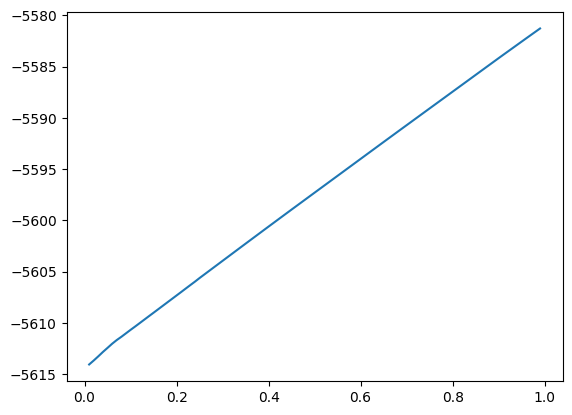

In [20]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [21]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
98,0.99,-5581.280885


## Random Forest
Creates a random forest regressor (rf) and calculates the mean absolute error using cross-validation.

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-2614.5905038828446

## Tune Models GridsearchCV
Performs hyperparameter tuning for the random forest model using GridSearchCV, trying different combinations of n_estimators, criterion, and max_features.

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('friedman_mse','absolute_error', 'poisson', 'squared_error'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `ma

RandomForestRegressor(criterion='friedman_mse', max_features='auto')

## test ensembles
- Loads the pickle file and retrieves the model.
- Makes predictions using the loaded model on a sample test instance.
- Prints the list of features for the second instance in the test set.

In [24]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(f"tpred_lm: {mean_absolute_error(y_test,tpred_lm)}")
print(f"tpred_lml: {mean_absolute_error(y_test,tpred_lml)}")
print(f"tpred_rf: {mean_absolute_error(y_test,tpred_rf)}")

print(f"tpred_lm + tpred_rf: {mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)}")
print(f"tpred_lm + tpred_lml: {mean_absolute_error(y_test,(tpred_lm+tpred_lml)/2)}")
print(f"tpred_rf + tpred_lml: {mean_absolute_error(y_test,(tpred_lml+tpred_rf)/2)}")

tpred_lm: 480250711680.58093
tpred_lml: 5036.282764954206
tpred_rf: 2912.211134531676
tpred_lm + tpred_rf: 240125357071.98727
tpred_lm + tpred_lml: 240125358358.43182
tpred_rf + tpred_lml: 3749.65597774059
